In [143]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv]
!rm ~/.cache/matplotlib -rf
!pip install statsmodels==0.12.1

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
fc-cache: invalid option -- ']'
usage: fc-cache [-EfrsvVh] [-y SYSROOT] [--error-on-no-fonts] [--force|--really-force] [--sysroot=SYSROOT] [--system-only] [--verbose] [--version] [--help] [dirs]
Build font information caches in [dirs]
(all directories in font configuration by default).

  -E, --error-on-no-fonts  raise an error if no fonts in a directory
  -f, --force              scan directories with apparently valid caches
  -r, --really-force       erase all existing caches, then rescan
  -s, --system-only        scan system-wide directories only
  -y, --sysroot=SYSROOT    prepend SYSROOT to all paths for scanning
  -v, --verbose            display status information while busy
  -V, --version            display font config version and exit
  -h, --help               di

In [2]:
! pip install googlemaps
! pip install xlrd

import io
import os
from google.colab import files
from google.colab import drive
import pandas as pd
import folium
import numpy as np
import googlemaps
import math
from folium.features import DivIcon
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR
import random
from scipy.stats import expon, reciprocal
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, LSTM
from random import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose, STL


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic') 

In [3]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
#불쓰데이터
df = pd.read_csv('/content/gdrive/MyDrive/prac/불쓰/불쓰오개년.csv')

In [5]:
df = df.rename(columns={'Unnamed: 0': '구역'})

In [6]:
df.groupby(['구역', '년도']).mean()

불쓰양     세대수     주택수     인구
구역   년도                                 
강서구  2015  1204.5   38727   32797    554
     2016   620.5   44112   37589    632
     2017  1241.0   47850   41987    678
     2018   839.5   50488   44028    709
     2019   636.6   53731   47138    744
금정구  2015  1131.5  101130   97988   3827
     2016  1861.5  102522   98500   3814
     2017   401.5  104827   99425   3814
     2018  1168.0  106415  101118   3795
     2019  1212.0  107024  101294   3736
기장군  2015  2190.0   60024   54006    712
     2016  2153.5   62810   56777    737
     2017  2445.5   65738   58788    751
     2018  1642.5   67970   61108    766
     2019  2124.0   69136   62178    765
남구   2015  4964.0  114120  109345  10703
     2016   109.5  113791  108478  10558
     2017  2080.5  113898  108016  10418
     2018  1460.0  117558  111261  10671
     2019  1438.2  117397  111594  10472
동구   2015  1423.5   43430   37865   9638
     2016    36.5   43036   37308   9426
     2017  1496.5   43413   37402   9328
     2018   547.5   43261   37194   9152
     2019   738.6   44657   38163   9167
동래구  2015  5110.0  106766   99022  16476
     2016  2847.0  107917   99683  16473
     2017  2774.0  108609  100540  16354
     2018  1752.0  108757  100613  16100
     2019  1879.9  112136  103176  16386
부산진구 2015  2956.5  165199  153541  12939
     2016  3248.5  165238  151910  12780
     2017  3905.5  166491  153075  12622
     2018  1825.0  165253  151852  12313
     2019  2232.2  166865  152433  12169
북구   2015  4599.0  118865  111109   7927
     2016  3431.0  120707  114093   7929
     2017  3139.0  120249  113476   7748
     2018  1204.5  120036  112896   7609
     2019  1571.4  120273  112242   7460
사상구  2015  4343.5   96671   91711   6724
     2016   109.5   96403   90745   6598
     2017   146.0   97169   90925   6501
     2018  1058.5   96698   90355   6346
     2019  1358.5   96726   90171   6193
사하구  2015  3577.0  134692  127160   8211
     2016  3796.0  135641  127097   8135
     2017  4599.0  137679  128433   8071
     2018  5365.5  138503  129242   7967
     2019  2348.7  138790  128548   7803
서구   2015   803.0   53199   46842   8443
     2016  1058.5   52497   46391   8220
     2017  1204.5   51953   45600   8008
     2018   949.0   52819   46072   8056
     2019   712.8   52786   46608   7893
수영구  2015  2810.5   76325   70064  17767
     2016  1533.0   77733   70784  17729
     2017  1642.5   79788   72186  17799
     2018  2555.0   79842   72556  17437
     2019  1058.9   81452   74187  17424
연제구  2015  3723.0   84543   78094  17520
     2016  2007.5   84398   78070  17208
     2017  1679.0   85892   79475  17168
     2018   985.5   87833   80104  17260
     2019  1108.0   90266   83398  17392
영도구  2015  1314.0   56446   52448   9276
     2016  1350.5   55893   51910   9039
     2017  1387.0   55713   50951   8833
     2018   620.5   55312   50356   8587
     2019   737.5   54859   49823   8354
중구   2015  2190.0   23295   20638  16795
     2016  1715.5   23282   20468  16649
     2017  1715.5   23284   20307  16278
     2018  2664.5   22975   19886  15849
     2019  1159.6   23160   19847  15573
해운대구 2015  4416.5  164386  153270   8316
     2016  4635.5  165290  154367   8258
     2017  4343.5  165002  153815   8105
     2018  3102.5  166748  154967   8055
     2019  3829.3  168650  156230   7991

In [7]:
## 가변수 하나 제거
df = pd.get_dummies(df, columns = ['구역','년도'])#, drop_first=True)

In [8]:
df.columns

Index(['불쓰양', '세대수', '주택수', '인구', '구역_강서구', '구역_금정구', '구역_기장군', '구역_남구',
       '구역_동구', '구역_동래구', '구역_부산진구', '구역_북구', '구역_사상구', '구역_사하구', '구역_서구',
       '구역_수영구', '구역_연제구', '구역_영도구', '구역_중구', '구역_해운대구', '년도_2015', '년도_2016',
       '년도_2017', '년도_2018', '년도_2019'],
      dtype='object')

In [9]:
df

,불쓰양,세대수,주택수,인구,구역_강서구,구역_금정구,구역_기장군,구역_남구,구역_동구,구역_동래구,구역_부산진구,구역_북구,구역_사상구,구역_사하구,구역_서구,구역_수영구,구역_연제구,구역_영도구,구역_중구,구역_해운대구,년도_2015,년도_2016,년도_2017,년도_2018,년도_2019
0,2190.0,23295,20638,16795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,803.0,53199,46842,8443,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,1423.5,43430,37865,9638,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1314.0,56446,52448,9276,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,2956.5,165199,153541,12939,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,5110.0,106766,99022,16476,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,4964.0,114120,109345,10703,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,4599.0,118865,111109,7927,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
8,4416.5,164386,153270,8316,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
9,3577.0,134692,127160,8211,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [10]:
X = df[['세대수', '주택수', '인구', '구역_강서구', '구역_금정구', '구역_기장군', '구역_남구',
       '구역_동구', '구역_동래구', '구역_부산진구', '구역_북구', '구역_사상구', '구역_사하구', '구역_서구',
       '구역_수영구', '구역_연제구', '구역_영도구', '구역_중구', '구역_해운대구', '년도_2015', '년도_2016',
       '년도_2017', '년도_2018', '년도_2019']]


y = df['불쓰양']

In [11]:
X.shape

(80, 24)

In [12]:
X

,세대수,주택수,인구,구역_강서구,구역_금정구,구역_기장군,구역_남구,구역_동구,구역_동래구,구역_부산진구,구역_북구,구역_사상구,구역_사하구,구역_서구,구역_수영구,구역_연제구,구역_영도구,구역_중구,구역_해운대구,년도_2015,년도_2016,년도_2017,년도_2018,년도_2019
0,23295,20638,16795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,53199,46842,8443,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,43430,37865,9638,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,56446,52448,9276,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,165199,153541,12939,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,106766,99022,16476,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,114120,109345,10703,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,118865,111109,7927,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
8,164386,153270,8316,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
9,134692,127160,8211,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X = sc.fit_transform(X)
X = pd.DataFrame(X, columns=['세대수', '주택수', '인구', '구역_강서구', '구역_금정구', '구역_기장군', '구역_남구',
       '구역_동구', '구역_동래구', '구역_부산진구', '구역_북구', '구역_사상구', '구역_사하구', '구역_서구',
       '구역_수영구', '구역_연제구', '구역_영도구', '구역_중구', '구역_해운대구', '년도_2015', '년도_2016',
       '년도_2017', '년도_2018', '년도_2019'])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

64
16
64
16


In [15]:
X_train

,세대수,주택수,인구,구역_강서구,구역_금정구,구역_기장군,구역_남구,구역_동구,구역_동래구,구역_부산진구,구역_북구,구역_사상구,구역_사하구,구역_서구,구역_수영구,구역_연제구,구역_영도구,구역_중구,구역_해운대구,년도_2015,년도_2016,년도_2017,년도_2018,년도_2019
62,0.506079,0.516985,0.335865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
78,0.506271,0.515636,0.326993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
44,0.431900,0.437210,0.963410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23,0.670891,0.691039,0.427660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.207476,0.197935,0.457466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24,0.976935,0.986340,0.446738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
65,0.204640,0.196219,0.425573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45,0.389998,0.383765,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
60,0.445224,0.441822,0.968745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20,0.976578,0.968324,0.708959,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
def evaluate(pred):

    MAE = mean_absolute_error(y_test, pred)
    MSE = mean_squared_error(y_test, pred)
    R2 = r2_score(y_test, pred)

    def smape(true, pred):
        v = 2 * abs(pred - true) / (abs(pred) + abs(true))
        output = np.mean(v) * 100
        return output

    SMAPE = smape(y_test, pred)
    
    print('R2 :', R2) 
    print('MAE : ', MAE)
    print('MSE : ', MSE)
    print('SMAPE : ', SMAPE)

In [17]:
def visual(model):
  plt.figure(dpi=200)
  plt.title('불쓰양 예측결과')
  plt.plot(np.array(y), alpha = 0.4, label = 'Real')
  plt.plot(model.predict(X), alpha = 0.4, label = 'Predict')
  plt.legend()
  plt.show()

In [18]:
# 회귀분석
#선형 회귀는 훈련 데이터에 가장 잘 들어 맞는 선형 방정식 를 찾는 문제입니다. 

model_lr = LinearRegression() 

model_lr.fit(X_train, y_train)
lr_predictions=model_lr.predict(X_test)
train_lr=model_lr.predict(X_train)

In [19]:
evaluate(lr_predictions)

R2 : -0.005463233741731077
MAE :  957.0434815637452
MSE :  1226036.7714514912
SMAPE :  44.48080319997313


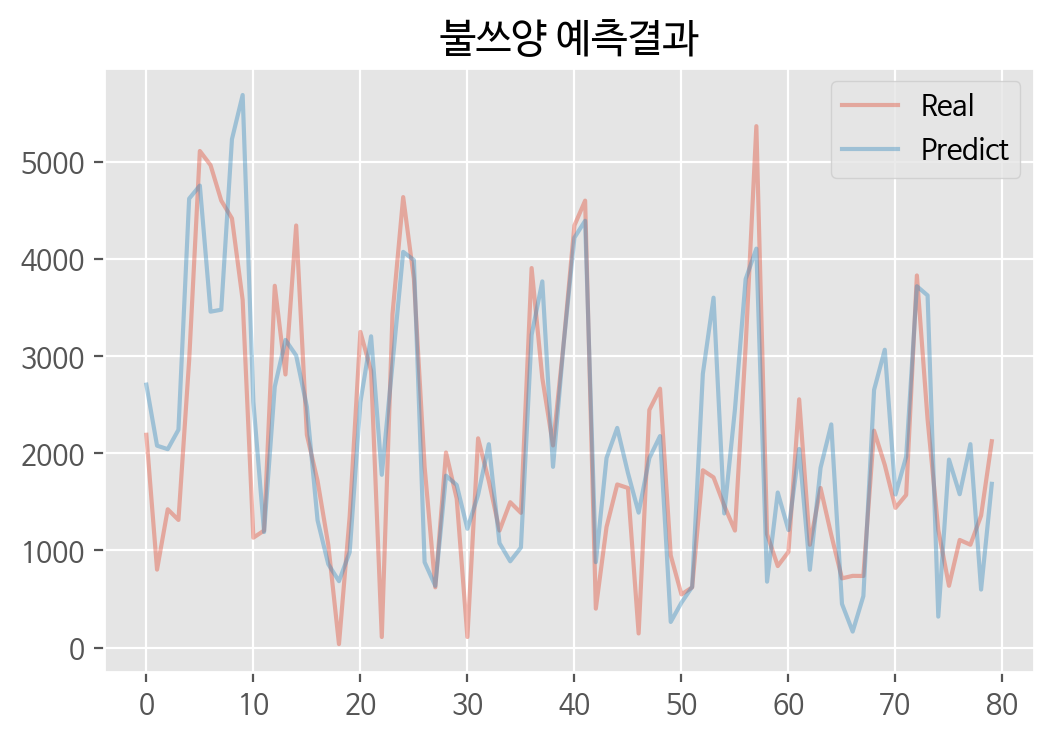

In [20]:
visual(model_lr)

In [22]:
# Lasso
from sklearn.linear_model import ElasticNet, Lasso
#변수의 개수를 줄일 수 없는 Ridge 와 달리 Lasso는 변수의 개수를 줄이고, 모델의 복잡성을 줄여서 모델 성능을 개선시킬 수 있다. 변수가 많은데 그중 일부분만 중요할때 용이함
model_Lasso= Lasso(alpha= 0.000001)
#알파가 작을 수록 복잡도 높아지고 피쳐 많이 사용함
model_Lasso.fit(X_train, y_train)
Lasso_predictions=model_Lasso.predict(X_test)
train_Lasso=model_Lasso.predict(X_train)

evaluate(Lasso_predictions)

R2 : 0.41698822344964137
MAE :  697.4907873109794
MSE :  710910.0086931731
SMAPE :  33.64239523559013


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17500569.255621664, tolerance: 12045.424452359375
  positive)


In [25]:
model_Lasso.predict(X)

array([2999.18592111, 2102.45663871, 1980.59507253, 2232.41061321,
       4195.26258215, 4622.86544225, 3129.06984047, 3852.23545216,
       5273.14003289, 5339.13975907, 2117.04941402, 1426.84044154,
       2924.50785556, 3104.26591041, 2571.92315719, 2742.80267243,
       1686.16586852,  779.22563057,  661.44704875,  915.85218262,
       2840.11944625, 3334.8564761 , 1781.70511714, 2663.34332776,
       4007.39375232, 4042.4123935 ,  835.72076256,  399.54473546,
       1662.02590002, 1837.91830811, 1217.69949613, 1573.34814514,
       1979.47631215,  984.25694721,  893.4689948 , 1126.43386272,
       3156.49083986, 3609.42701808, 1998.69538188, 2867.70830314,
       4211.40189587, 4363.62123786, 1133.4608783 ,  847.92121669,
       1958.95507094, 2121.19130997, 1466.00498822, 1924.49859357,
       1621.55424373,  552.31750943,  471.2408036 ,  703.96426194,
       2702.94048303, 3230.7233252 , 1694.30777103, 2419.88331052,
       3862.67332631, 3987.41629047,  787.46603606,  535.31172

In [ ]:
model_lr.predict(X)

array([2705.88359392, 2078.1207669 , 2042.14861353, 2241.92940881,
       4619.63410079, 4753.69883644, 3456.82340448, 3476.83460469,
       5231.44406792, 5685.89252432, 2528.18681873, 1189.41674556,
       2684.62215572, 3165.97555818, 3005.55159186, 2477.30790119,
       1309.63929325,  859.26891536,  684.00908037,  982.6436304 ,
       2524.06640814, 3203.30116356, 1778.72221823, 2919.27634638,
       4071.85954847, 3988.01051473,  879.17690106,  635.58325444,
       1769.22299968, 1673.70736538, 1222.71972594, 1572.58129639,
       2092.83866115, 1075.61983737,  888.34921716, 1029.48972103,
       3217.90498833, 3768.26046396, 1860.44268965, 3132.55180695,
       4218.49161577, 4391.90150898,  879.8038023 , 1951.55399789,
       2260.88417447, 1797.87234163, 1389.03655289, 1950.31308234,
       2177.13845168,  264.39584862,  462.94332829,  624.92709462,
       2817.429022  , 3600.67714794, 1380.72950989, 2451.08616636,
       3791.14883576, 4105.18403179,  678.90518147, 1596.03109

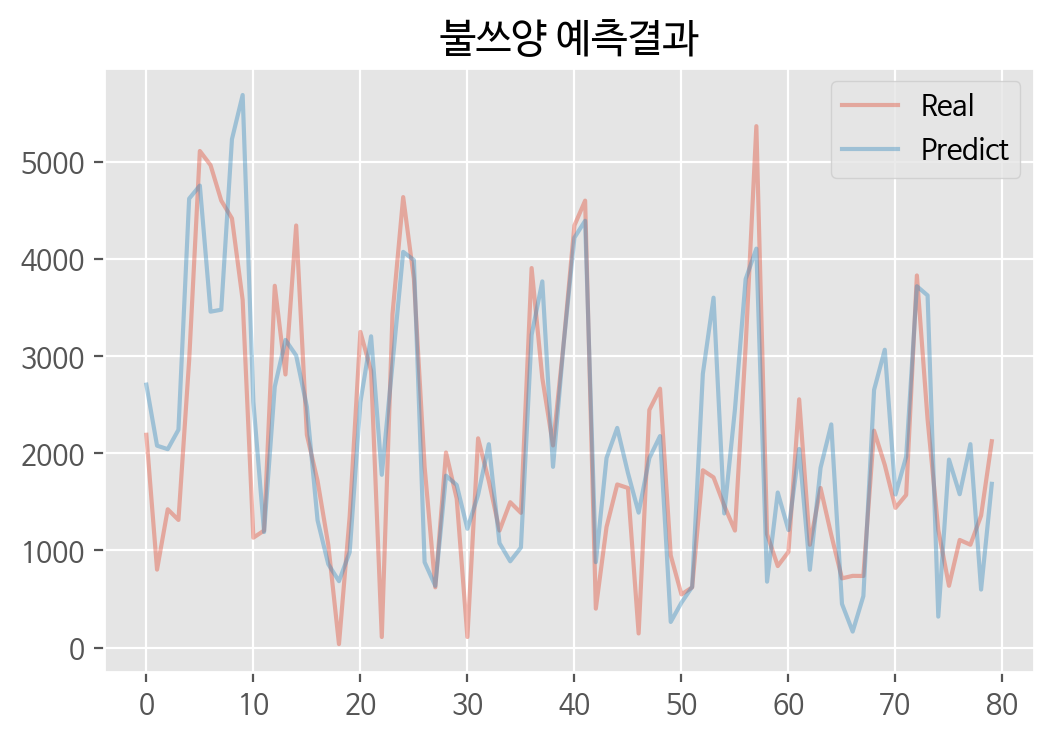

In [29]:
  plt.figure(dpi=200)
  plt.title('불쓰양 예측결과')
  plt.plot(np.array(y), alpha = 0.4, label = 'Real')
  plt.plot(model_Lasso.predict(X), alpha = 0.4, label = 'Predict')
  plt.plot(model_lr.predict(X), alpha = 0.4, label = 'Predict')
  plt.plot(model_lr.predict(X), alpha = 0.4, label = 'Predict')
  plt.legend()
  plt.show()

In [34]:
# ENet

model_ENet = ElasticNet(alpha=0.1)

model_ENet.fit(X_train, y_train)
ENet_predictions=model_ENet.predict(X_test)
train_ENet=model_ENet.predict(X_train)

evaluate(ENet_predictions)

R2 : 0.754756730607755
MAE :  438.39942639660194
MSE :  299043.5215685967
SMAPE :  20.428246485006607


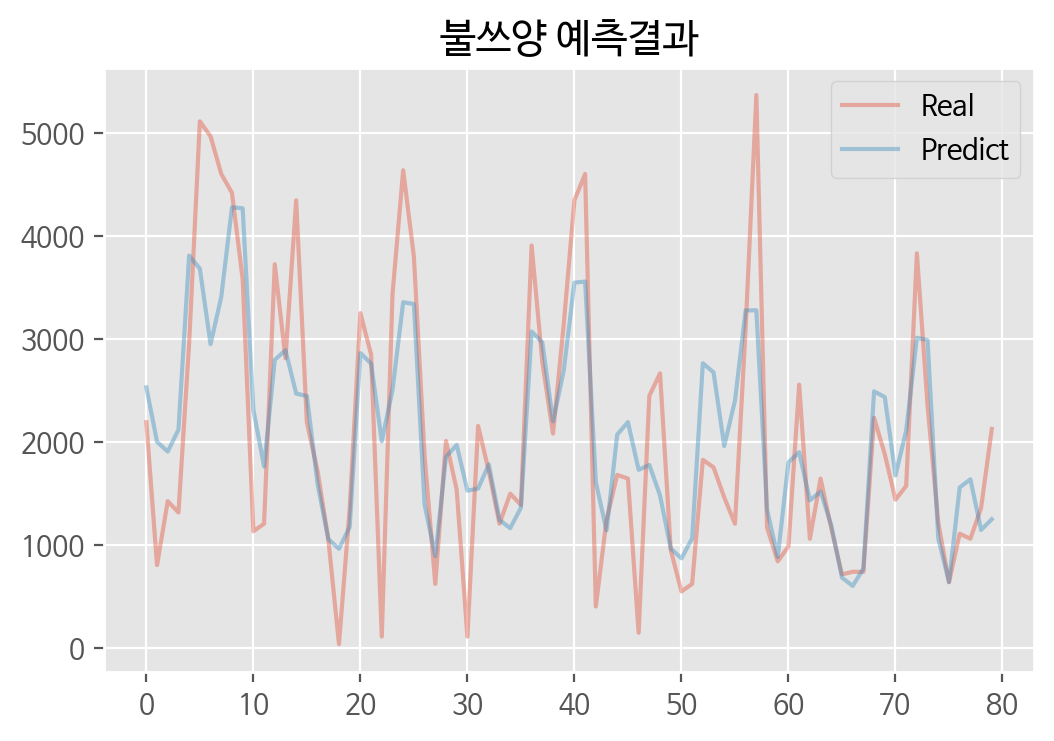

In [35]:
visual(model_ENet)

## XGBOOST

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb_model.fit(x_train, y_train)
xgb_predictions=xgb_model.predict(x_test)
#train_xgb=model_xgb.predict(X_train)

[04:22:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
R2 = r2_score(y_test, xgb_predictions)
R2

0.5907095032724254

In [ ]:
evaluate(xgb_predictions)

MAE :  560.8119667053222
MSE :  499078.6160586247
SMAPE :  25.912078942425993


## 랜포

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

def smape(true, pred):
      v = 2 * abs(pred - true) / (abs(pred) + abs(true))
      output = np.mean(v) * 100
      return output
SMAPE = smape(y_test, y_pred)

#print(y_pred)
#print(list(y_test))
print('R2 :', R2)
print('MAE :', MAE)
print('평균불쓰양 :', df['불쓰양'].mean())
print('SMAPE : ', SMAPE)

# 정확도 확인
#print('정확도 :', metrics.accuracy_score(y_test, y_pred))

R2 : 0.6791296348654123
MAE : 508.83181249999996
평균불쓰양 : 2041.9650000000001
SMAPE :  25.442033379519568


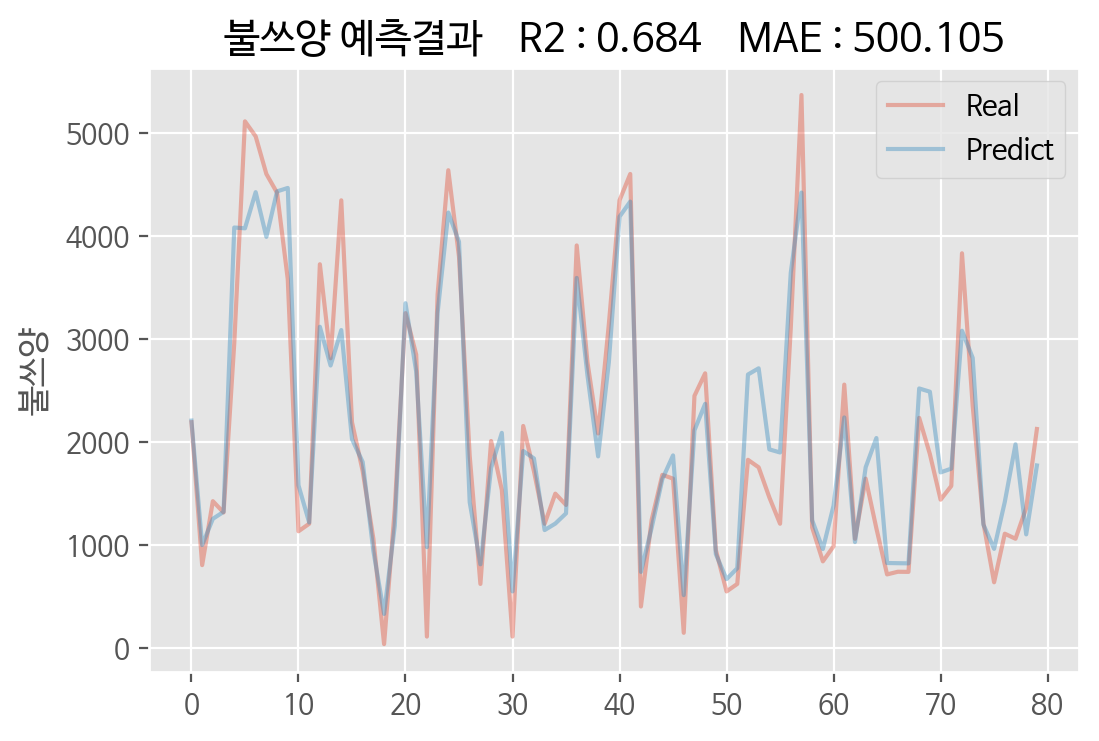

In [ ]:
plt.figure(dpi=200)
plt.title('불쓰양 예측결과    R2 : ' + str(R2)[:5] + '    MAE : ' + str(MAE)[:7])
plt.ylabel('불쓰양')
plt.plot(np.array(y), alpha = 0.4, label = 'Real')
plt.plot(model.predict(x), alpha = 0.4, label = 'Predict')
plt.legend()
plt.show()

In [ ]:
def evaluate(pred):

    MAE = mean_absolute_error(y_test, pred)
    MSE = mean_squared_error(y_test, pred)

    def smape(true, pred):
        v = 2 * abs(pred - true) / (abs(pred) + abs(true))
        output = np.mean(v) * 100
        return output

    SMAPE = smape(y_test, pred)
    
    print('MAE : ', MAE)
    print('MSE : ', MSE)
    print('SMAPE : ', SMAPE)

In [ ]:
# GBoost

from sklearn.ensemble import GradientBoostingRegressor

model_GBoost = GradientBoostingRegressor()

model_GBoost.fit(x_train, y_train)
GBoost_predictions=model_GBoost.predict(x_test)
train_GBoost=model_GBoost.predict(x_train)

evaluate(GBoost_predictions)

MAE :  609.6882317456043
MSE :  617898.0586550783
SMAPE :  27.766084480265203


#yhat

In [ ]:
df2 = df

In [ ]:
df2

,불쓰양,세대수,주택수,인구,구역_강서구,구역_금정구,구역_기장군,구역_남구,구역_동구,구역_동래구,구역_부산진구,구역_북구,구역_사상구,구역_사하구,구역_서구,구역_수영구,구역_연제구,구역_영도구,구역_중구,구역_해운대구,년도_2015,년도_2016,년도_2017,년도_2018,년도_2019
0,2190.0,23295,20638,16795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,803.0,53199,46842,8443,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,1423.5,43430,37865,9638,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1314.0,56446,52448,9276,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,2956.5,165199,153541,12939,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,5110.0,106766,99022,16476,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,4964.0,114120,109345,10703,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,4599.0,118865,111109,7927,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
8,4416.5,164386,153270,8316,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
9,3577.0,134692,127160,8211,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df2['yhat'] = df['불쓰양'].shift(-16)

In [ ]:
df2

,불쓰양,세대수,주택수,인구,구역_강서구,구역_금정구,구역_기장군,구역_남구,구역_동구,구역_동래구,구역_부산진구,구역_북구,구역_사상구,구역_사하구,구역_서구,구역_수영구,구역_연제구,구역_영도구,구역_중구,구역_해운대구,년도_2015,년도_2016,년도_2017,년도_2018,년도_2019,yhat
0,2190.0,23295,20638,16795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1715.5
1,803.0,53199,46842,8443,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1058.5
2,1423.5,43430,37865,9638,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,36.5
3,1314.0,56446,52448,9276,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1350.5
4,2956.5,165199,153541,12939,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3248.5
5,5110.0,106766,99022,16476,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2847.0
6,4964.0,114120,109345,10703,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,109.5
7,4599.0,118865,111109,7927,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3431.0
8,4416.5,164386,153270,8316,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,4635.5
9,3577.0,134692,127160,8211,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,3796.0


In [ ]:
#학습시킬 테이블과 예측시킬 테이블 나누기
learn = df2[df2['yhat'].notnull()]
#learn = learn.drop(['통역'], axis=1)

predict = df2[df2['yhat'].isnull()]
#predict = predict.drop(["통역"], axis=1)


In [ ]:
learn

,불쓰양,세대수,주택수,인구,구역_강서구,구역_금정구,구역_기장군,구역_남구,구역_동구,구역_동래구,구역_부산진구,구역_북구,구역_사상구,구역_사하구,구역_서구,구역_수영구,구역_연제구,구역_영도구,구역_중구,구역_해운대구,년도_2015,년도_2016,년도_2017,년도_2018,년도_2019,yhat
0,2190.0,23295,20638,16795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1715.5
1,803.0,53199,46842,8443,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1058.5
2,1423.5,43430,37865,9638,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,36.5
3,1314.0,56446,52448,9276,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1350.5
4,2956.5,165199,153541,12939,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3248.5
5,5110.0,106766,99022,16476,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2847.0
6,4964.0,114120,109345,10703,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,109.5
7,4599.0,118865,111109,7927,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3431.0
8,4416.5,164386,153270,8316,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,4635.5
9,3577.0,134692,127160,8211,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,3796.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# 피쳐 첫번째, 총질소부터 
# 피쳐 마지막, 총인 까지 스케일링
learn_ft = learn.iloc[:, 0:25]
predict_ft = predict.iloc[:, 0:25]

sc = MinMaxScaler()

learn_sc = sc.fit_transform(learn_ft)
learn_sc = pd.DataFrame(learn_sc, columns=[learn_ft.columns], index=learn_ft.index)

predict_sc = sc.fit_transform(predict_ft)
predict_sc = pd.DataFrame(predict_sc, columns=[predict_ft.columns], index=predict_ft.index)

learn_sc.head()

,불쓰양,세대수,주택수,인구,구역_강서구,구역_금정구,구역_기장군,구역_남구,구역_동구,구역_동래구,구역_부산진구,구역_북구,구역_사상구,구역_사하구,구역_서구,구역_수영구,구역_연제구,구역_영도구,구역_중구,구역_해운대구,년도_2015,년도_2016,년도_2017,년도_2018,년도_2019
0,0.404110,0.002226,0.005567,0.941780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.143836,0.210220,0.199554,0.457466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.260274,0.142273,0.133098,0.526761,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.239726,0.232804,0.241055,0.505770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.547945,0.989226,0.989443,0.718179,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X = learn_sc[learn_sc.columns]
y = learn['yhat']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [ ]:
X

,불쓰양,세대수,주택수,인구,구역_강서구,구역_금정구,구역_기장군,구역_남구,구역_동구,구역_동래구,구역_부산진구,구역_북구,구역_사상구,구역_사하구,구역_서구,구역_수영구,구역_연제구,구역_영도구,구역_중구,구역_해운대구,년도_2015,년도_2016,년도_2017,년도_2018,년도_2019
0,0.404110,0.002226,0.005567,0.941780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.143836,0.210220,0.199554,0.457466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.260274,0.142273,0.133098,0.526761,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.239726,0.232804,0.241055,0.505770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.547945,0.989226,0.989443,0.718179,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.952055,0.582801,0.585841,0.923282,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.924658,0.633951,0.662262,0.588518,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.856164,0.666954,0.675321,0.427544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.821918,0.983571,0.987437,0.450101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9,0.664384,0.777037,0.794146,0.444013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
y

0     1715.5
1     1058.5
2       36.5
3     1350.5
4     3248.5
5     2847.0
6      109.5
7     3431.0
8     4635.5
9     3796.0
10    1861.5
11     620.5
12    2007.5
13    1533.0
14     109.5
15    2153.5
16    1715.5
17    1204.5
18    1496.5
19    1387.0
20    3905.5
21    2774.0
22    2080.5
23    3139.0
24    4343.5
25    4599.0
26     401.5
27    1241.0
28    1679.0
29    1642.5
30     146.0
31    2445.5
32    2664.5
33     949.0
34     547.5
35     620.5
36    1825.0
37    1752.0
38    1460.0
39    1204.5
40    3102.5
41    5365.5
42    1168.0
43     839.5
44     985.5
45    2555.0
46    1058.5
47    1642.5
48    1159.6
49     712.8
50     738.6
51     737.5
52    2232.2
53    1879.9
54    1438.2
55    1571.4
56    3829.3
57    2348.7
58    1212.0
59     636.6
60    1108.0
61    1058.9
62    1358.5
63    2124.0
Name: yhat, dtype: float64

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

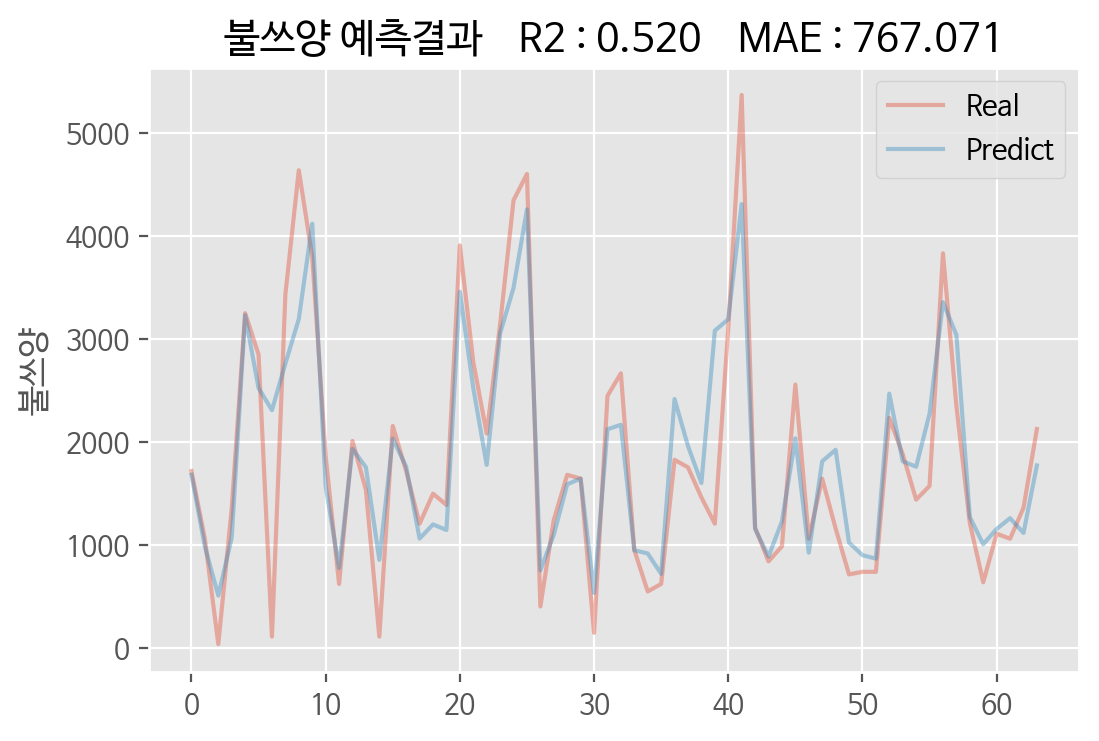

In [ ]:
plt.figure(dpi=200)
plt.title('불쓰양 예측결과    R2 : ' + str(R2)[:5] + '    MAE : ' + str(MAE)[:7])
plt.ylabel('불쓰양')
plt.plot(np.array(y), alpha = 0.4, label = 'Real')
plt.plot(model.predict(X), alpha = 0.4, label = 'Predict')
plt.legend()
plt.show()